## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.468547  0.978624 -1.492597  0.929403  0.395605  2.091447
1 -1.199429 -0.925370  1.666698 -1.451670 -0.443637 -1.123335
2 -0.355233 -0.048301 -0.186026  0.955407 -1.527147 -0.110018
3  1.508834  0.718723 -0.263135  0.575528 -0.719195  0.611852
4  0.069262  1.345238  0.408222  0.436815 -0.924582  0.672447


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0118064	total: 46.6ms	remaining: 46.6s
1:	learn: 1.0005802	total: 47ms	remaining: 23.5s
2:	learn: 0.9883304	total: 47.4ms	remaining: 15.8s
3:	learn: 0.9773663	total: 47.8ms	remaining: 11.9s
4:	learn: 0.9665365	total: 48.2ms	remaining: 9.58s
5:	learn: 0.9555762	total: 48.6ms	remaining: 8.05s
6:	learn: 0.9423063	total: 49ms	remaining: 6.95s
7:	learn: 0.9319666	total: 49.3ms	remaining: 6.12s
8:	learn: 0.9223166	total: 49.7ms	remaining: 5.47s
9:	learn: 0.9122453	total: 50.1ms	remaining: 4.96s
10:	learn: 0.9029062	total: 50.4ms	remaining: 4.54s
11:	learn: 0.8922342	total: 50.8ms	remaining: 4.18s
12:	learn: 0.8813693	total: 51.1ms	remaining: 3.88s
13:	learn: 0.8723785	total: 51.5ms	remaining: 3.63s
14:	learn: 0.8637416	total: 51.8ms	remaining: 3.4s
15:	learn: 0.8546087	total: 52.2ms	remaining: 3.21s
16:	learn: 0.8447616	total: 52.5ms	remaining: 3.04s
17:	learn: 0.8361544	total: 52.8ms	remaining: 2.88s
18:	learn: 0.8269497	total: 53.1ms	remaining: 2.7

184:	learn: 0.1896990	total: 112ms	remaining: 492ms
185:	learn: 0.1883903	total: 112ms	remaining: 491ms
186:	learn: 0.1869033	total: 113ms	remaining: 490ms
187:	learn: 0.1851923	total: 113ms	remaining: 488ms
188:	learn: 0.1837440	total: 113ms	remaining: 487ms
189:	learn: 0.1821735	total: 114ms	remaining: 485ms
190:	learn: 0.1807856	total: 114ms	remaining: 483ms
191:	learn: 0.1794156	total: 114ms	remaining: 482ms
192:	learn: 0.1780533	total: 115ms	remaining: 480ms
193:	learn: 0.1768206	total: 115ms	remaining: 479ms
194:	learn: 0.1754974	total: 116ms	remaining: 477ms
195:	learn: 0.1741189	total: 116ms	remaining: 475ms
196:	learn: 0.1729859	total: 116ms	remaining: 474ms
197:	learn: 0.1717197	total: 117ms	remaining: 472ms
198:	learn: 0.1709382	total: 117ms	remaining: 471ms
199:	learn: 0.1698427	total: 117ms	remaining: 469ms
200:	learn: 0.1690098	total: 118ms	remaining: 468ms
201:	learn: 0.1679132	total: 118ms	remaining: 466ms
202:	learn: 0.1666154	total: 118ms	remaining: 465ms
203:	learn: 

469:	learn: 0.0421048	total: 214ms	remaining: 241ms
470:	learn: 0.0418411	total: 214ms	remaining: 241ms
471:	learn: 0.0415640	total: 215ms	remaining: 240ms
472:	learn: 0.0414733	total: 215ms	remaining: 240ms
473:	learn: 0.0412017	total: 216ms	remaining: 239ms
474:	learn: 0.0409327	total: 216ms	remaining: 239ms
475:	learn: 0.0407902	total: 216ms	remaining: 238ms
476:	learn: 0.0405423	total: 217ms	remaining: 238ms
477:	learn: 0.0402811	total: 217ms	remaining: 237ms
478:	learn: 0.0401952	total: 217ms	remaining: 237ms
479:	learn: 0.0398938	total: 218ms	remaining: 236ms
480:	learn: 0.0396428	total: 218ms	remaining: 235ms
481:	learn: 0.0393914	total: 218ms	remaining: 235ms
482:	learn: 0.0393294	total: 219ms	remaining: 234ms
483:	learn: 0.0390994	total: 219ms	remaining: 234ms
484:	learn: 0.0388500	total: 220ms	remaining: 233ms
485:	learn: 0.0387899	total: 220ms	remaining: 233ms
486:	learn: 0.0386574	total: 220ms	remaining: 232ms
487:	learn: 0.0383772	total: 221ms	remaining: 231ms
488:	learn: 

739:	learn: 0.0134322	total: 312ms	remaining: 109ms
740:	learn: 0.0134234	total: 312ms	remaining: 109ms
741:	learn: 0.0134146	total: 312ms	remaining: 109ms
742:	learn: 0.0133721	total: 313ms	remaining: 108ms
743:	learn: 0.0133635	total: 313ms	remaining: 108ms
744:	learn: 0.0133548	total: 313ms	remaining: 107ms
745:	learn: 0.0132612	total: 314ms	remaining: 107ms
746:	learn: 0.0132529	total: 314ms	remaining: 106ms
747:	learn: 0.0131898	total: 315ms	remaining: 106ms
748:	learn: 0.0131815	total: 315ms	remaining: 106ms
749:	learn: 0.0131271	total: 315ms	remaining: 105ms
750:	learn: 0.0130657	total: 316ms	remaining: 105ms
751:	learn: 0.0130575	total: 316ms	remaining: 104ms
752:	learn: 0.0130494	total: 316ms	remaining: 104ms
753:	learn: 0.0129594	total: 317ms	remaining: 103ms
754:	learn: 0.0129514	total: 317ms	remaining: 103ms
755:	learn: 0.0128917	total: 317ms	remaining: 102ms
756:	learn: 0.0128838	total: 318ms	remaining: 102ms
757:	learn: 0.0128113	total: 318ms	remaining: 102ms
758:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

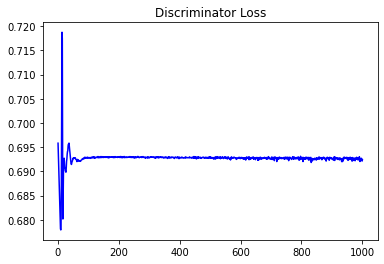

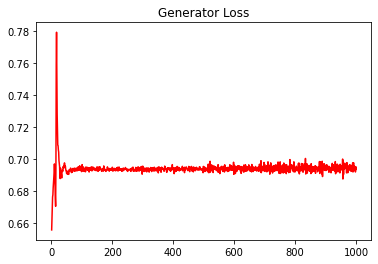

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09192914177932686


#### Sanity Checks 

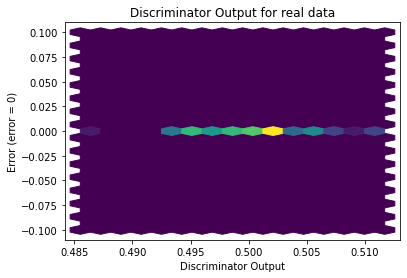

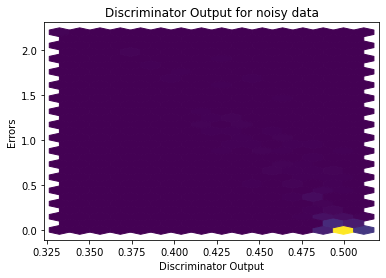

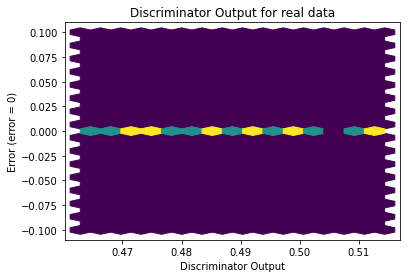

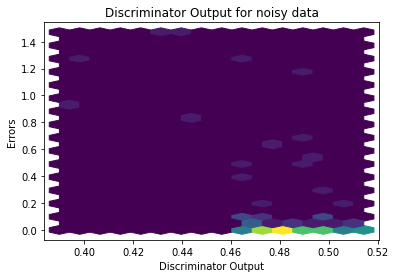

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


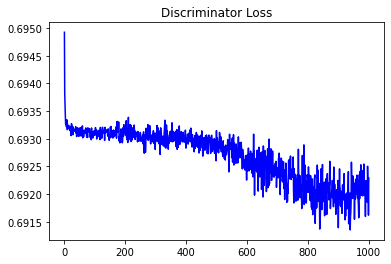

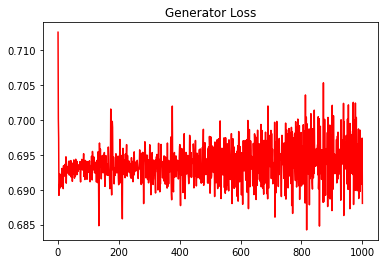

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11630943986086201


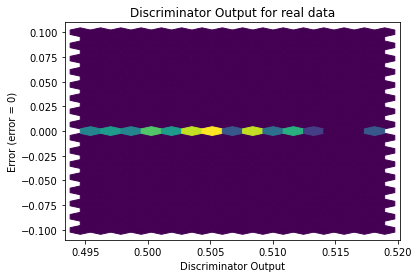

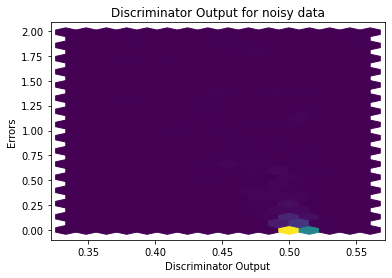

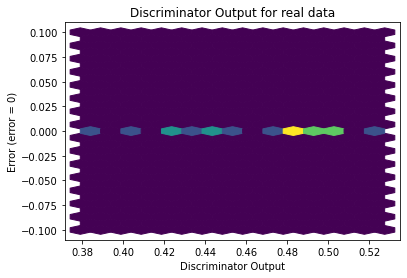

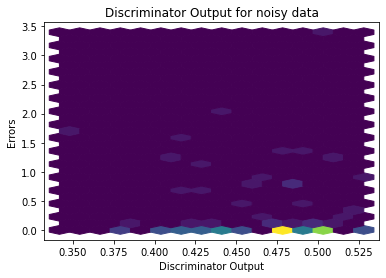

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1466]], device='cuda:0', requires_grad=True)
